In [3]:
import warnings
warnings.filterwarnings("ignore")
#Data Manipulation and Treatment
import numpy as np
import pandas as pd
from datetime import datetime
#Plotting and Visualizations
import matplotlib.pyplot as plt
ccimport seaborn as sns
from scipy import stats
import itertools
#Scikit-Learn for Modeling
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [4]:
def str_to_date(date):
    return datetime.strptime(date, '%Y-%m-%d').date()

In [5]:
#The training Set
df_train = pd.read_csv("train.csv",sep=',', parse_dates=['Date'],
                       low_memory = False)


#Additional Information on those stores 
df_store = pd.read_csv("store.csv"
                       , low_memory = False)

In [5]:
df_train.head() 

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2018-07-31,5263,555,1,1,0,1
1,2,5,2018-07-31,6064,625,1,1,0,1
2,3,5,2018-07-31,8314,821,1,1,0,1
3,4,5,2018-07-31,13995,1498,1,1,0,1
4,5,5,2018-07-31,4822,559,1,1,0,1


In [6]:
df_train.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2016-01-01,0,0,0,0,a,1
1017205,1112,2,2016-01-01,0,0,0,0,a,1
1017206,1113,2,2016-01-01,0,0,0,0,a,1
1017207,1114,2,2016-01-01,0,0,0,0,a,1
1017208,1115,2,2016-01-01,0,0,0,0,a,1


In [7]:
df_train.dtypes,print ("The Train dataset has {} Rows and {} Variables".format(str(df_train.shape[0]),str(df_train.shape[1])))

The Train dataset has 1017209 Rows and 9 Variables


(Store                     int64
 DayOfWeek                 int64
 Date             datetime64[ns]
 Sales                     int64
 Customers                 int64
 Open                      int64
 Promo                     int64
 StateHoliday             object
 SchoolHoliday             int64
 dtype: object, None)

In [8]:
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [9]:
df_store.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [10]:
df_store.dtypes ,print ("The Store dataset has {} Rows (which means unique Shops) and {} Variables".format(str(df_store.shape[0]),str(df_store.shape[1]))) 

The Store dataset has 1115 Rows (which means unique Shops) and 10 Variables


(Store                          int64
 StoreType                     object
 Assortment                    object
 CompetitionDistance          float64
 CompetitionOpenSinceMonth    float64
 CompetitionOpenSinceYear     float64
 Promo2                         int64
 Promo2SinceWeek              float64
 Promo2SinceYear              float64
 PromoInterval                 object
 dtype: object, None)

<h2>Data Wrangling and Exploration:</h2>

How many missing fields each variable has:

In [11]:
df_train.count(0)/df_train.shape[0] * 100

Store            100.0
DayOfWeek        100.0
Date             100.0
Sales            100.0
Customers        100.0
Open             100.0
Promo            100.0
StateHoliday     100.0
SchoolHoliday    100.0
dtype: float64

In [7]:
df_train=df_train.drop(df_train[(df_train.Open == 0) & (df_train.Sales == 0)].index)

In [8]:
df_train = df_train.reset_index(drop=True) #making sure the indexes are back to [0,1,2,3 etc.] 

In [9]:
print ("Our new training set has now {} rows ".format(df_train.shape[0]))

Our new training set has now 844392 rows 


**1) Sales:**

In [10]:
df_train.Sales.describe() 
#we see here a minimum of 0 which means some stores even opened got 0 sales on some days.

count    844392.000000
mean       6955.516113
std        3104.221189
min           0.000000
25%        4859.000000
50%        6369.000000
75%        8360.000000
max       41551.000000
Name: Sales, dtype: float64

In [11]:
df_train=df_train.drop(df_train[(df_train.Open == 1) & (df_train.Sales == 0)].index)
df_train = df_train.reset_index(drop=True) 

In [13]:
print ("{0:.2f}% of the time Rossman are actually having big sales day (considered outliers).".format(df_train[df_train.Sales>14000].count()[0]/df_train.shape[0]*100))
print ("{0:.2f}% of the time Rossman are actually having no sales at all.".format(df_train[df_train.Sales==0].count()[0]/df_train.shape[0]*100))

3.21% of the time Rossman are actually having big sales day (considered outliers).
0.00% of the time Rossman are actually having no sales at all.


In [14]:
df_train.Customers.describe()    

count    844338.000000
mean        762.777429
std         401.194973
min           8.000000
25%         519.000000
50%         676.000000
75%         893.000000
max        7388.000000
Name: Customers, dtype: float64

In [16]:
print ("{0:.2f}% of the time Rossman are actually having customers more than usual (considered outliers).".format(df_train[df_train.Customers>1500].count()[0]/df_train.shape[0]*100))
print ("{0:.2f}% of the time Rossman are actually having no customers at all.".format(df_train[df_train.Customers==0].count()[0]/df_train.shape[0]*100))

4.37% of the time Rossman are actually having customers more than usual (considered outliers).
0.00% of the time Rossman are actually having no customers at all.


In [17]:
df_train[df_train.Customers>7000]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
825160,817,2,2016-01-22,27190,7388,1,1,0,0


In [18]:
stats.pearsonr(df_train.Customers, df_train.Sales)[0]

0.8235520263213598

<h3>A closer look at the Store Dataset:</h3>

In [19]:
df_store.count(0)/df_store.shape[0] * 100

Store                        100.000000
StoreType                    100.000000
Assortment                   100.000000
CompetitionDistance           99.730942
CompetitionOpenSinceMonth     68.251121
CompetitionOpenSinceYear      68.251121
Promo2                       100.000000
Promo2SinceWeek               51.210762
Promo2SinceYear               51.210762
PromoInterval                 51.210762
dtype: float64

**Findings:**

- The `Promo2SinceWeek`,`Promo2SinceYear` and `PromoInterval` variables has 51% fill rate since they are actually NULL values because there are no continuous promotion for those stores. 

- Instead for `CompetitionOpenSinceMonth` and `CompetitionOpenSinceYear`, it's basically missing data that we're dealing with here (68.25% fill rate), this means that we have the nearest distance of the competitor but miss the date information on when did he actually opened next to the Rossman store.

**Let's start the cleansing process by order:**

1) `CompetitionDistance`:

In [20]:
df_store[pd.isnull(df_store.CompetitionDistance)] 
#rows with missing values for Competition Distance, only 3 rows with null which makes sense since 99.73% is filled

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


{'Mean': 5404.901079136691,
 'Median': 2325.0,
 'Standard Dev': 7659.7282732764415}

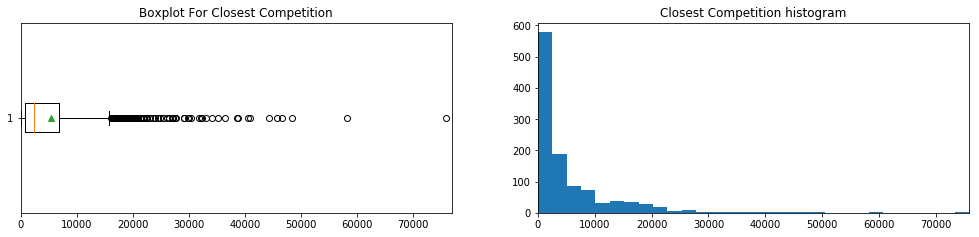

In [21]:
df_store_check_distribution=df_store.drop(df_store[pd.isnull(df_store.CompetitionDistance)].index)
fig, axes = plt.subplots(1, 2, figsize=(17,3.5))
axes[0].boxplot(df_store_check_distribution.CompetitionDistance, showmeans=True,vert=False,)
axes[0].set_xlim(0,max(df_store_check_distribution.CompetitionDistance+1000))
axes[0].set_title('Boxplot For Closest Competition')
axes[1].hist(df_store_check_distribution.CompetitionDistance, cumulative=False, bins=30)
axes[1].set_title("Closest Competition histogram")
axes[1].set_xlim((min(df_store_check_distribution.CompetitionDistance), max(df_store_check_distribution.CompetitionDistance)))
{"Mean":np.nanmean(df_store.CompetitionDistance),"Median":np.nanmedian(df_store.CompetitionDistance),"Standard Dev":np.nanstd(df_store.CompetitionDistance)}#That's what i thought, very different values, let's see why 

We see a highly right skewed distribution for this variable with a significant difference between the mean and the median. This being caused by the amount of disperness in the data with a standard deviation of 7659, higher than the mean and the median.

In [22]:
df_store['CompetitionDistance'].fillna(df_store['CompetitionDistance'].median(), inplace = True)

In [23]:
df_store.CompetitionOpenSinceMonth.fillna(0, inplace = True)
df_store.CompetitionOpenSinceYear.fillna(0,inplace=True)

In [25]:
df_store.Promo2SinceWeek.fillna(0,inplace=True)
df_store.Promo2SinceYear.fillna(0,inplace=True)
df_store.PromoInterval.fillna(0,inplace=True)

In [26]:
df_store.count(0)/df_store.shape[0] * 100

Store                        100.0
StoreType                    100.0
Assortment                   100.0
CompetitionDistance          100.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                       100.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64

In [27]:
#Left-join the train to the store dataset since .Why?
#Because you want to make sure you have all events even if some of them don't have their store information ( which shouldn't happen)
df_train_store = pd.merge(df_train, df_store, how = 'left', on = 'Store')
df_train_store.head() 
print ("The Train_Store dataset has {} Rows and {} Variables".format(str(df_train_store.shape[0]),str(df_train_store.shape[1]))) 


The Train_Store dataset has 844338 Rows and 18 Variables


<h3>Store Type Analysis:</h3>

The best way to asses the performance of a store type is to see what is the sales per customer so that we normalize everything and we get the store that makes its customers spend the most on average.


Let's compare first the total sales of each store type, its average sales and then see how it changes when we add the customers to the equation:

In [28]:
df_train_store['SalesperCustomer']=df_train_store['Sales']/df_train_store['Customers']

In [29]:
df_train_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,SalesperCustomer
0,1,5,2018-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9.482883
1,2,5,2018-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",9.702400
2,3,5,2018-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",10.126675
3,4,5,2018-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,9.342457
4,5,5,2018-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,8.626118


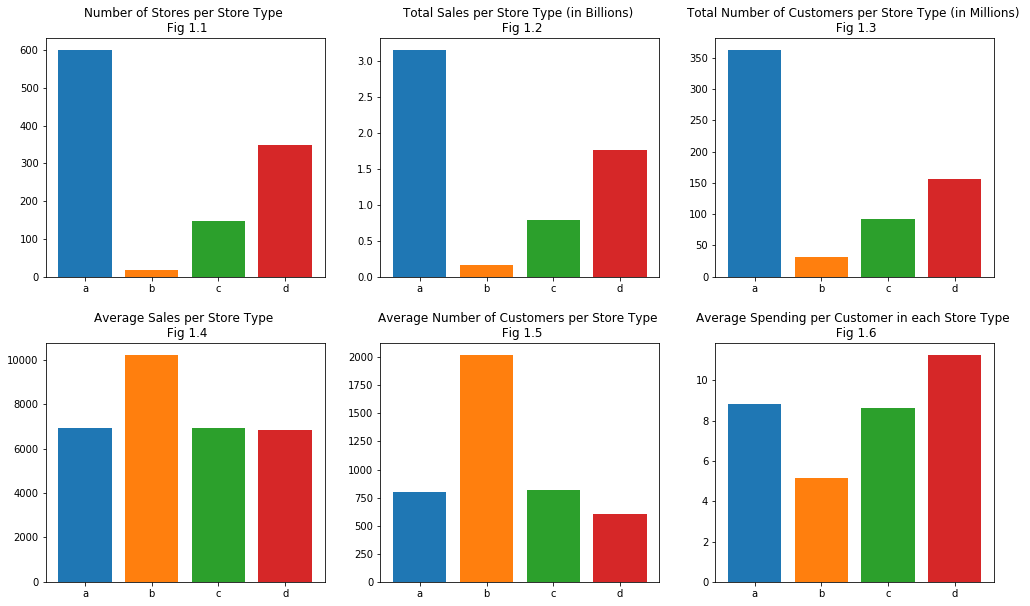

In [30]:
fig, axes = plt.subplots(2, 3,figsize=(17,10) )
palette = itertools.cycle(sns.color_palette(n_colors=4))
plt.subplots_adjust(hspace = 0.28)
#axes[1].df_train_store.groupby(by="StoreType").count().Store.plot(kind='bar')
axes[0,0].bar(df_store.groupby(by="StoreType").count().Store.index,df_store.groupby(by="StoreType").count().Store,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,0].set_title("Number of Stores per Store Type \n Fig 1.1")
axes[0,1].bar(df_train_store.groupby(by="StoreType").sum().Sales.index,df_train_store.groupby(by="StoreType").sum().Sales/1e9,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,1].set_title("Total Sales per Store Type (in Billions) \n Fig 1.2")
axes[0,2].bar(df_train_store.groupby(by="StoreType").sum().Customers.index,df_train_store.groupby(by="StoreType").sum().Customers/1e6,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,2].set_title("Total Number of Customers per Store Type (in Millions) \n Fig 1.3")
axes[1,0].bar(df_train_store.groupby(by="StoreType").sum().Customers.index,df_train_store.groupby(by="StoreType").Sales.mean(),color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,0].set_title("Average Sales per Store Type \n Fig 1.4")
axes[1,1].bar(df_train_store.groupby(by="StoreType").sum().Customers.index,df_train_store.groupby(by="StoreType").Customers.mean(),color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,1].set_title("Average Number of Customers per Store Type \n Fig 1.5")
axes[1,2].bar(df_train_store.groupby(by="StoreType").sum().Sales.index,df_train_store.groupby(by="StoreType").SalesperCustomer.mean(),color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,2].set_title("Average Spending per Customer in each Store Type \n Fig 1.6")
plt.show()

**Findings:**
- From this training set we can see that Storetype A has the highest number of branches,sales and customers from the 4 different storetypes. But this doesn't mean it's the best performing Storetype.

- When looking at the average sales and number of customers, we see that actually it is Storetype B who was the highest average Sales and highest average Number of Customers. One assumption could be that if B has only 17 stores but such a high amount of average sales and customers that it is likely hyper Rossman branches whereas A would be smaller in size but much more present.

- Surprisingly it is StoreType D who has the highest average spending per Customer, this is probably explained by an average competition distance higher than ther rest which means each customer will buy more since he knows there isn't a lot of similair shops around.

- What would help us understand better what's happening is to look for other variables explaining this behaviour like Assortments, Comeptition and Promotions.

<h3>Assortments:</h3>

As we cited in the description, assortments have three types and each store has a defined type and assortment type: 
- `a` means basic things
- `b` means extra things
- `c` means extended things so the highest variety of products.

What could be interesting is to see the relationship between a store type and its respective assortment type.

StoreType  Assortment
a          a             381
           c             221
b          a               7
           b               9
           c               1
c          a              77
           c              71
d          a             128
           c             220
Name: Assortment, dtype: int64

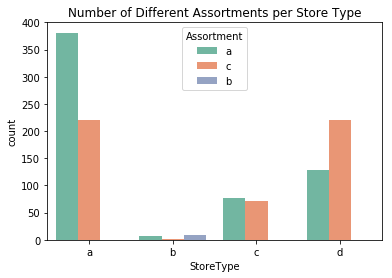

In [31]:
StoretypeXAssortment = sns.countplot(x="StoreType",hue="Assortment",order=["a","b","c","d"], data=df_store,palette=sns.color_palette("Set2", n_colors=3)).set_title("Number of Different Assortments per Store Type")
df_store.groupby(by=["StoreType","Assortment"]).Assortment.count()



**Findings:**
- We can clearly see here that most of the stores have either `a` assortment type or `c` assortment type.
- Interestingly enough StoreType d which has the highest Sales per customer average actually has mostly `c` assortment type, this is most probably the reason for having this high average in Sales per customer.Having variery in stores always increases the customers spending pattern.


**Promotion:**

Let's see how Promotion affect the overall sales of Rossman store by looking at when there is and when there isn't promotion over those 3 years. This allow us first to see the impact of promotion and as well to see the evolution of sales over specific years (so trends in a given year) and the gradual increase in sales from 2016 to 2018:

In [32]:
df_train_store['Month']=df_train_store.Date.dt.month
df_train_store['Year']=df_train_store.Date.dt.year

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


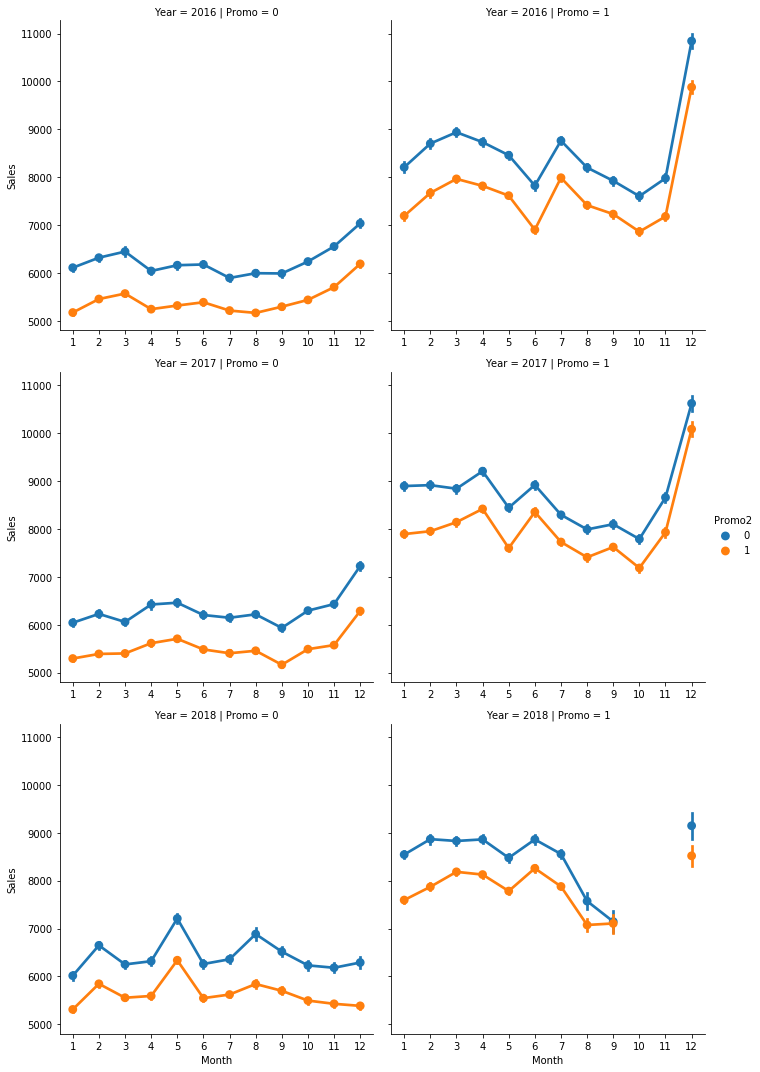

In [33]:

sns.factorplot(data = df_train_store, x ="Month", y = "Sales", 
               col = 'Promo', # per store type in cols
               hue = 'Promo2',
               row = "Year"
              ,sharex=False)


C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


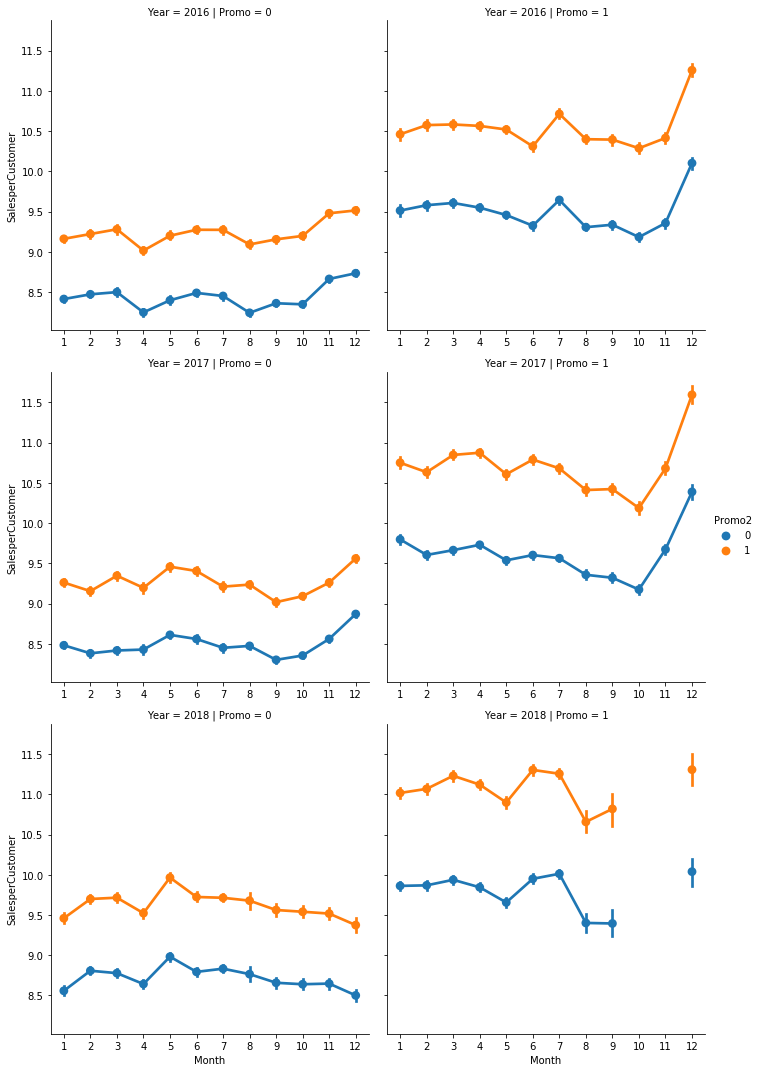

In [34]:
sns.factorplot(data = df_train_store, x ="Month", y = "SalesperCustomer", 
               col = 'Promo', # per store type in cols
               hue = 'Promo2',
               row = "Year"
              ,sharex=False)

**Findings:**
- We see the dramatic change when we compare having promotion `Promo`=1 to not having promotion `Promo`=0 and can conclude that a store that have promotion on a given day changes its amount of sales considerably.
-  When checking the Sales per Customer over promotion we understand that initially those stores suffer from low sales and those continuous promotion shows a tremending increase in the buying power of customers.
- If we look over the years,there is a slight increase Year over Year but we don't see any major change from 2016 to 2018 and we actually see a very similair pattern in the months over the years with major spikes first around Easter period in March and April then in Summer in May,June and July and then finally around the Christmas period in November and December.

In [36]:
#33 Stores are opened on Sundays
print ("Number of Stores opened on Sundays:{}" .format(df_train_store[(df_train_store.Open == 1) & (df_train_store.DayOfWeek == 7)]['Store'].unique().shape[0]))

Number of Stores opened on Sundays:33


**Competition Distance:**

In [37]:
df_train_store['CompetitionDist_Cat']=pd.cut(df_train_store['CompetitionDistance'], 5)

In [38]:
df_train_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,SalesperCustomer,Month,Year,CompetitionDist_Cat
0,1,5,2018-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,0.0,0.0,0,9.482883,7,2018,"(-55.84, 15188.0]"
1,2,5,2018-07-31,6064,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",9.702400,7,2018,"(-55.84, 15188.0]"
2,3,5,2018-07-31,8314,821,1,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",10.126675,7,2018,"(-55.84, 15188.0]"
3,4,5,2018-07-31,13995,1498,1,1,0,1,c,...,9.0,2009.0,0,0.0,0.0,0,9.342457,7,2018,"(-55.84, 15188.0]"
4,5,5,2018-07-31,4822,559,1,1,0,1,a,...,4.0,2015.0,0,0.0,0.0,0,8.626118,7,2018,"(15188.0, 30356.0]"


In [39]:
df_train_store.groupby(by="CompetitionDist_Cat").Sales.mean(),df_train_store.groupby(by="CompetitionDist_Cat").Customers.mean()

(CompetitionDist_Cat
 (-55.84, 15188.0]     6957.362776
 (15188.0, 30356.0]    7041.606049
 (30356.0, 45524.0]    6471.923849
 (45524.0, 60692.0]    5980.114445
 (60692.0, 75860.0]    7775.446449
 Name: Sales, dtype: float64, CompetitionDist_Cat
 (-55.84, 15188.0]     771.345501
 (15188.0, 30356.0]    691.574765
 (30356.0, 45524.0]    680.101854
 (45524.0, 60692.0]    643.988246
 (60692.0, 75860.0]    914.574972
 Name: Customers, dtype: float64)

In [40]:
del df_train_store["CompetitionDist_Cat"]

Let's get Days from Date and delete Date since we already have its Year and Month:

In [41]:
df_train_store['Day']=df_train_store.Date.dt.day

In [42]:
del df_train_store["Date"]

We still have StoreType,Assortment and StateHoliday as Obejcts we need to convert them to numerical categories:

But first we need to make sure we don't have Nan before doing those transformations otherwise Nan will be equal to -1

In [43]:
df_train_store['StoreType'].isnull().any(),df_train_store['Assortment'].isnull().any(),df_train_store['StateHoliday'].isnull().any()
#No Null values we can proceed with the transformation

(False, False, False)

In [44]:
df_train_store["StoreType"].value_counts(),df_train_store["Assortment"].value_counts(),df_train_store["StateHoliday"].value_counts()

(a    457042
 d    258768
 c    112968
 b     15560
 Name: StoreType, dtype: int64, a    444875
 c    391254
 b      8209
 Name: Assortment, dtype: int64, 0    843428
 a       694
 b       145
 c        71
 Name: StateHoliday, dtype: int64)

In [45]:
df_train_store['StateHoliday'] = df_train_store['StateHoliday'].astype('category')
df_train_store['Assortment'] = df_train_store['Assortment'].astype('category')
df_train_store['StoreType'] = df_train_store['StoreType'].astype('category')
df_train_store['PromoInterval']= df_train_store['PromoInterval'].astype('category')

In [46]:
df_train_store['StateHoliday_cat'] = df_train_store['StateHoliday'].cat.codes
df_train_store['Assortment_cat'] = df_train_store['Assortment'].cat.codes
df_train_store['StoreType_cat'] = df_train_store['StoreType'].cat.codes
df_train_store['PromoInterval_cat'] = df_train_store['PromoInterval'].cat.codes



In [47]:
df_train_store['StateHoliday_cat'] = df_train_store['StateHoliday_cat'].astype('float')
df_train_store['Assortment_cat'] = df_train_store['Assortment_cat'].astype('float')
df_train_store['StoreType_cat'] = df_train_store['StoreType_cat'].astype('float')
df_train_store['PromoInterval_cat'] = df_train_store['PromoInterval_cat'].astype('float')

Since associating 0,1,2,3 to categorical variables like StoreType,Assortment,StateHoliday affect the bias of the algorithm (0 would account less then 3 when actually StoreType a and StoreType c should be treated equally).
I will just convert it to categorical now for the purpose of the correlation analysis and then use the get_dummies function to encode them binarly.

In [48]:

#df_train_store[['StateHoliday', 'StoreType', 'Assortment']] = df_train_store[['StateHoliday', 'StoreType', 'Assortment']].apply(lambda x: x.cat.codes)

In [49]:
df_train_store.dtypes

Store                           int64
DayOfWeek                       int64
Sales                           int64
Customers                       int64
Open                            int64
Promo                           int64
StateHoliday                 category
SchoolHoliday                   int64
StoreType                    category
Assortment                   category
CompetitionDistance           float64
CompetitionOpenSinceMonth     float64
CompetitionOpenSinceYear      float64
Promo2                          int64
Promo2SinceWeek               float64
Promo2SinceYear               float64
PromoInterval                category
SalesperCustomer              float64
Month                           int64
Year                            int64
Day                             int64
StateHoliday_cat              float64
Assortment_cat                float64
StoreType_cat                 float64
PromoInterval_cat             float64
dtype: object

<h3>Correlation Analysis:</h3>

In [50]:
df_correlation=df_train_store[['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
        'SchoolHoliday',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'SalesperCustomer', 'Month', 'Year',
       'Day', 'StateHoliday_cat', 'Assortment_cat', 'StoreType_cat',
       'PromoInterval_cat']]

In [115]:
df_correlation=df_correlation.drop('Open', axis = 1)

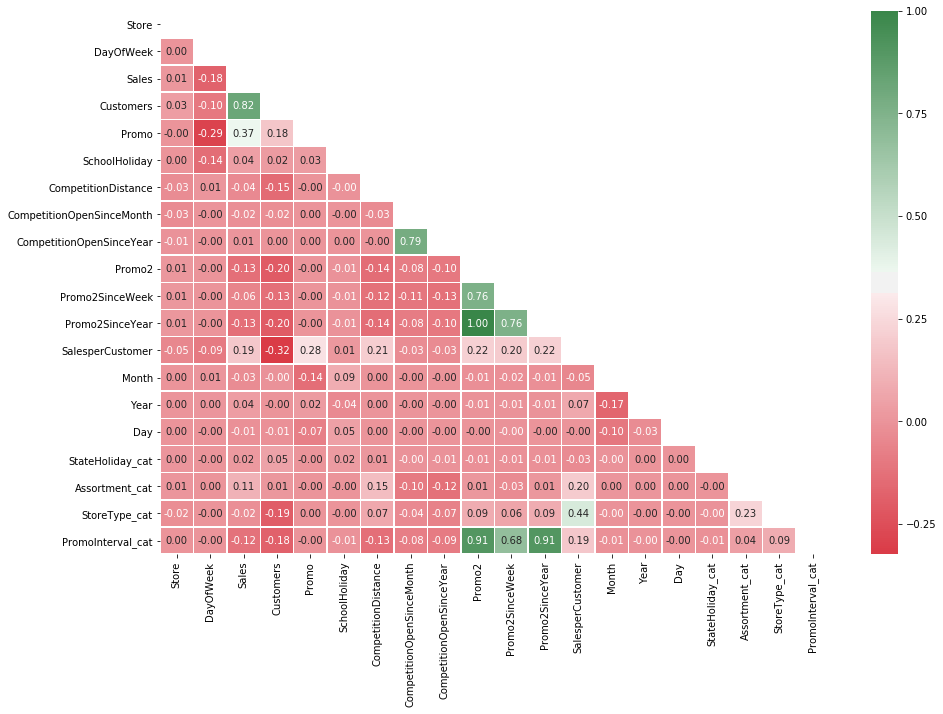

In [116]:
upper_triangle = np.zeros_like(df_correlation.corr(), dtype = np.bool)
upper_triangle[np.triu_indices_from(upper_triangle)] = True #make sure we don't show half of the other triangle
f, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(df_correlation.corr(),ax=ax,mask=upper_triangle,annot=True, fmt='.2f',linewidths=0.5,cmap=sns.diverging_palette(10, 133, as_cmap=True))

**Interpretation:**
- We can first see the 0.82 between Customers and sales which suggests that they are positively correlated like we stated above in the analysis.
- It's interesting to see that Sales per Customer and Promo (0.28) actually correlate positively, since running a promotion increases that number .
- Sales per Customer also correlates with Competition Distance(0.21), in a positive manner, like i said up the higher the competitionn distance the more sales per customer we do, which makes sense , the further our competition, the more monopolization Rossman can achieve in the region.
- Additionally, the effect of promo2 to Sales per Customer like we said above as well(0.22), it  did provoke a change in the buying pattern and increased it when continuous promotion were applied.
- Finally, we can see that StoreType does play a major role with Sales per Customer (0.44), this is probably due to my encoding of the store type variable which suggests that the high categories like d which is equal 4 has higher weight, but if not then it makes sense that the last categories like d does explain the increase in Sales per Customer like fig 1.6 shows.

<h2>Training with RandomForest Regressor:</h2>

**Further Feature Engineering before Training:**

In [51]:
df_train_store.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'SalesperCustomer', 'Month', 'Year',
       'Day', 'StateHoliday_cat', 'Assortment_cat', 'StoreType_cat',
       'PromoInterval_cat'],
      dtype='object')

In [52]:
df_train_store['CompetitionOpenSince'] = np.where((df_train_store['CompetitionOpenSinceMonth']==0) & (df_train_store['CompetitionOpenSinceYear']==0) , 0,(df_train_store.Month - df_train_store.CompetitionOpenSinceMonth) + 
                                       (12 * (df_train_store.Year - df_train_store.CompetitionOpenSinceYear)) )

In [53]:
#now that CompetitionOpenSince is created 
#we can get rid of `CompetitionOpenSinceYear` and `CompeitionOpenSinceMonth`
del df_train_store['CompetitionOpenSinceYear']
del df_train_store['CompetitionOpenSinceMonth']


In [54]:
df_train_store["is_holiday_state"] = df_train_store['StateHoliday'].map({"0": 0, "a": 1, "b": 1, "c": 1})

In [55]:
del df_train_store['StateHoliday_cat']

In [56]:
df_train_store=pd.get_dummies(df_train_store, columns=["Assortment", "StoreType","PromoInterval"], prefix=["is_Assortment", "is_StoreType","is_PromoInteval"])

In [57]:
del df_train_store['Assortment_cat']
del df_train_store['StoreType_cat']


In [58]:
del df_train_store['PromoInterval_cat']

In [59]:
df_train_store.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'CompetitionDistance', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'SalesperCustomer', 'Month',
       'Year', 'Day', 'CompetitionOpenSince', 'is_holiday_state',
       'is_Assortment_a', 'is_Assortment_b', 'is_Assortment_c',
       'is_StoreType_a', 'is_StoreType_b', 'is_StoreType_c', 'is_StoreType_d',
       'is_PromoInteval_0', 'is_PromoInteval_Feb,May,Aug,Nov',
       'is_PromoInteval_Jan,Apr,Jul,Oct', 'is_PromoInteval_Mar,Jun,Sept,Dec'],
      dtype='object')

<h3>Test Set Adaptation:</h3>

In [60]:
df_test = pd.read_csv("test.csv",sep=',', parse_dates=['Date'],
                       low_memory = False)
print ("The Test dataset has {} Rows and {} Variables".format(str(df_test.shape[0]),str(df_test.shape[1])))

The Test dataset has 41088 Rows and 8 Variables


In [61]:
df_test.fillna(1, inplace = True) #11rows with Nans decided to leave them open since its one store 622 which is 
#usually open
#Left-join the train to the store dataset since .Why?
#Because you want to make sure you have all events even if some of them don't have their store information ( which shouldn't happen)
df_test_store = pd.merge(df_test, df_store, how = 'left', on = 'Store')
print ("The Test_Store dataset has {} Rows and {} Variables".format(str(df_test_store.shape[0]),str(df_test_store.shape[1]))) 
df_test_store['Month']=df_test_store.Date.dt.month
df_test_store['Year']=df_test_store.Date.dt.year
df_test_store['Day']=df_test_store.Date.dt.day

df_test_store['StateHoliday'] = df_test_store['StateHoliday'].astype('category')
df_test_store['Assortment'] = df_test_store['Assortment'].astype('category')
df_test_store['StoreType'] = df_test_store['StoreType'].astype('category')
df_test_store['PromoInterval']= df_test_store['PromoInterval'].astype('category')
df_test_store['StateHoliday_cat'] = df_test_store['StateHoliday'].cat.codes
df_test_store['Assortment_cat'] = df_test_store['Assortment'].cat.codes
df_test_store['StoreType_cat'] = df_test_store['StoreType'].cat.codes
df_test_store['PromoInterval_cat'] = df_test_store['PromoInterval'].cat.codes
df_test_store['StateHoliday_cat'] = df_test_store['StateHoliday_cat'].astype('float')
df_test_store['Assortment_cat'] = df_test_store['Assortment_cat'].astype('float')
df_test_store['StoreType_cat'] = df_test_store['StoreType_cat'].astype('float')
df_test_store['PromoInterval_cat'] = df_test_store['PromoInterval_cat'].astype('float')
df_test_store['CompetitionOpenSince'] = np.where((df_test_store['CompetitionOpenSinceMonth']==0) & (df_test_store['CompetitionOpenSinceYear']==0) , 0,(df_test_store.Month - df_test_store.CompetitionOpenSinceMonth) + 
                                       (12 * (df_test_store.Year - df_test_store.CompetitionOpenSinceYear)) )



df_test_store["is_holiday_state"] = df_test_store['StateHoliday'].map({"0": 0, "a": 1, "b": 1, "c": 1})




df_test_store=pd.get_dummies(df_test_store, columns=["Assortment", "StoreType","PromoInterval"], prefix=["is_Assortment", "is_StoreType","is_PromoInteval"])


The Test_Store dataset has 41088 Rows and 17 Variables


In [62]:
del df_test_store['Date']
del df_test_store['CompetitionOpenSinceYear']
del df_test_store['CompetitionOpenSinceMonth']


In [63]:
del df_test_store['StateHoliday_cat']

In [64]:
del df_test_store['Assortment_cat']
del df_test_store['StoreType_cat']
del df_test_store['PromoInterval_cat']

In [65]:
del df_test_store['StateHoliday']

In [66]:
del df_train_store['StateHoliday']

In [67]:
def rmspe(y, yhat):
    rmspe = np.sqrt(np.mean( (y - yhat)**2 ))
    return rmspe

In [68]:
features = df_train_store.drop(['Customers', 'Sales', 'SalesperCustomer'], axis = 1) 
#transform my target value to log if i see the values are very dispersed which is the case
targets=np.log(df_train_store.Sales)


In [143]:
X_train, X_train_test, y_train, y_train_test = model_selection.train_test_split(features, targets, test_size=0.20, random_state=15)
print ("Training and testing split was successful.")


Training and testing split was successful.


In [144]:
rfr = RandomForestRegressor(n_estimators=10, 
                             criterion='mse', 
                             max_depth=5, 
                             min_samples_split=2, 
                             min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, 
                             max_features='auto', 
                             max_leaf_nodes=None, 
                             min_impurity_decrease=0.0, 
                             min_impurity_split=None, 
                             bootstrap=True, 
                             oob_score=False,
                             n_jobs=4,
                             random_state=31, 
                             verbose=0, 
                             warm_start=False)
rfr.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
           oob_score=False, random_state=31, verbose=0, warm_start=False)

In [145]:

'''
params = {'max_depth':(4,6,8,10,12,14,16,20),
         'n_estimators':(4,8,16,24,48,72,96,128),
         'min_samples_split':(2,4,6,8,10)}
#scoring_fnc = metrics.make_scorer(rmspe)
#the dimensionality is high, the number of combinations we have to search is enormous, using RandomizedSearchCV 
# is a better option then GridSearchCV
grid = model_selection.RandomizedSearchCV(estimator=rfr,param_distributions=params,cv=10) 
#choosing 10 K-Folds makes sure i went through all of the data and didn't miss any pattern.(takes time to run but is worth doing it)
grid.fit(X_train, y_train)
'''
#All ready i have executed the program and we get the best paramaters for our model which will be used later on while developing Machine Learning model

"\nparams = {'max_depth':(4,6,8,10,12,14,16,20),\n         'n_estimators':(4,8,16,24,48,72,96,128),\n         'min_samples_split':(2,4,6,8,10)}\n#scoring_fnc = metrics.make_scorer(rmspe)\n#the dimensionality is high, the number of combinations we have to search is enormous, using RandomizedSearchCV \n# is a better option then GridSearchCV\ngrid = model_selection.RandomizedSearchCV(estimator=rfr,param_distributions=params,cv=10) \n#choosing 10 K-Folds makes sure i went through all of the data and didn't miss any pattern.(takes time to run but is worth doing it)\ngrid.fit(X_train, y_train)\n"

In [146]:
#This is the best combination i got from what i propose to try out with a (mse) score of 0.855 which is quite good
#grid.best_params_,grid.best_score_
#MY BEST PARAMS ARE :n_estimators=128,max_depth=20,min_samples_split=10

## Test our RF on the validation set:

In [147]:
#with the optimal parameters i got let's see how it behaves with the validation set
rfr_val=RandomForestRegressor(n_estimators=128, 
                             criterion='mse', 
                             max_depth=20, 
                             min_samples_split=10, 
                             min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, 
                             max_features='auto', 
                             max_leaf_nodes=None, 
                             min_impurity_decrease=0.0, 
                             min_impurity_split=None, 
                             bootstrap=True, 
                             oob_score=False,
                             n_jobs=4, #setting n_jobs to 4 makes sure you're using the full potential of the machine you're running the training on
                             random_state=35, 
                             verbose=0, 
                             warm_start=False)
model_RF_test=rfr_val.fit(X_train,y_train)

In [148]:
yhat=model_RF_test.predict(X_train_test)

In [150]:
error=rmspe(y_train_test,yhat)
error

0.1629166664720833

**In order to understand better what happened when we ran our randomforest regressor, here is a chart that represents, the importance and role that each variable that i decided to include played in this learning process:**

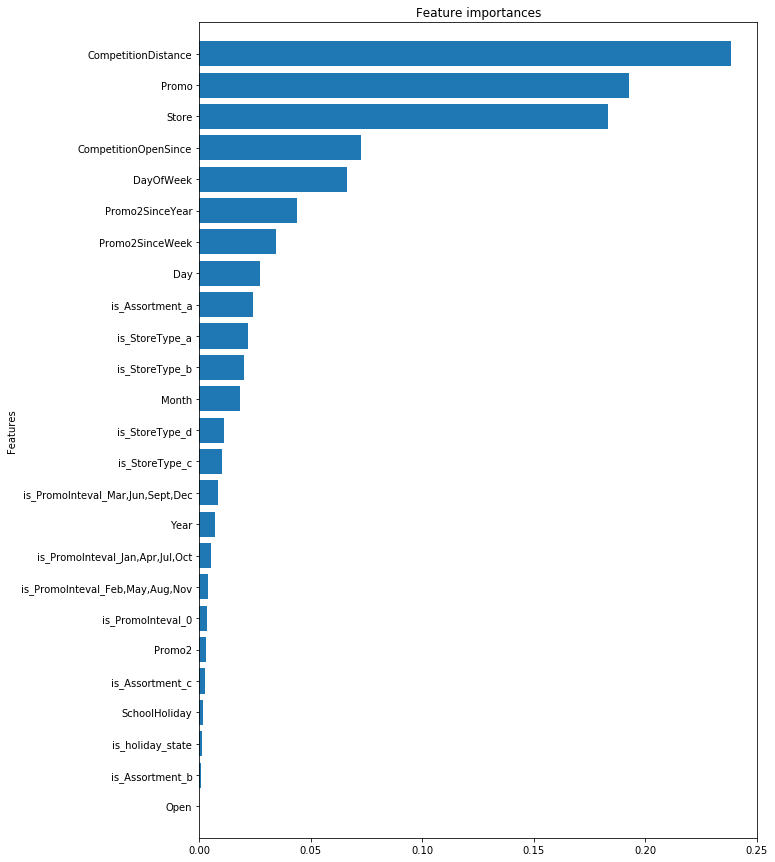

In [151]:
importances = rfr_val.feature_importances_
std = np.std([rfr_val.feature_importances_ for tree in rfr_val.estimators_],
             axis=0)
indices = np.argsort(importances)
palette1 = itertools.cycle(sns.color_palette())
# Store the feature ranking
features_ranked=[]
for f in range(X_train.shape[1]):
    features_ranked.append(X_train.columns[indices[f]])
# Plot the feature importances of the forest

plt.figure(figsize=(10,15))
plt.title("Feature importances")
plt.barh(range(X_train.shape[1]), importances[indices],
            color=[next(palette1)], align="center")
plt.yticks(range(X_train.shape[1]), features_ranked)
plt.ylabel('Features')
plt.ylim([-1, X_train.shape[1]])
plt.show()



In [152]:
df_test_store1=df_test_store.drop(['Id'],axis=1)
kaggle_yhat= model_RF_test.predict(df_test_store1)
kaggle_preds= pd.DataFrame({'Id': df_test_store['Id'], 
                          'Sales': np.exp(kaggle_yhat)})
kaggle_preds.to_csv("submission.csv", index = False)
